<a href="https://colab.research.google.com/github/zahra-zarrabi/Bot_DeepLearning/blob/master/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers 
print(tf.__version__)

2.6.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
width=height=224
batch_size = 32
data_generator=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2)

train_data = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Persian_Recognition',
    class_mode='categorical',
    target_size=(width,height),
    batch_size=batch_size,
    shuffle=True,
    subset='training')

val_data = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Persian_Recognition',
    class_mode='categorical',
    target_size=(width,height),
    batch_size=batch_size,
    shuffle=True,
    subset='validation')

Found 2338 images belonging to 2 classes.
Found 584 images belonging to 2 classes.


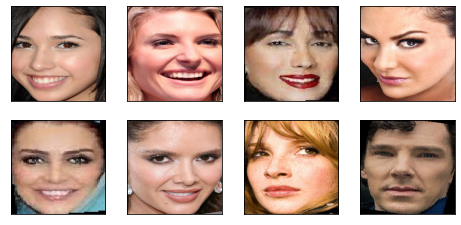

In [4]:
train_images=next(train_data)[0]
plt.figure(figsize=(8,8))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  # plt.gride(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)

In [5]:
base_model = tf.keras.applications.ResNet50V2(
    input_shape=(width,height,3),
    include_top=False,
    weights='imagenet',
    pooling='max')

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [6]:
#freeze layers
for layer in base_model.layers[:-2]:
  layer.trainable=False


In [7]:
model = tf.keras.Sequential([                             
                             base_model,
                             layers.Dense(2, activation='sigmoid')])


In [8]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [9]:
model.fit(
    train_data,
    steps_per_epoch=train_data.samples/batch_size,   #149/32
    validation_data=val_data,
    validation_steps = val_data.samples/batch_size,    #37/32
    epochs=20,
    class_weight={0:1,1:3})
    # callbacks=[WandbCallback()])

Epoch 1/20
73/73 [==============================] - 764s 10s/step - loss: 0.9299 - accuracy: 0.8362 - val_loss: 0.6470 - val_accuracy: 0.8014
Epoch 2/20
73/73 [==============================] - 29s 399ms/step - loss: 0.4725 - accuracy: 0.9226 - val_loss: 0.5884 - val_accuracy: 0.8373
Epoch 3/20
73/73 [==============================] - 29s 394ms/step - loss: 0.3541 - accuracy: 0.9401 - val_loss: 0.7294 - val_accuracy: 0.7945
Epoch 4/20
73/73 [==============================] - 30s 406ms/step - loss: 0.2826 - accuracy: 0.9448 - val_loss: 0.3815 - val_accuracy: 0.8990
Epoch 5/20
73/73 [==============================] - 30s 404ms/step - loss: 0.2288 - accuracy: 0.9602 - val_loss: 0.5646 - val_accuracy: 0.8408
Epoch 6/20
73/73 [==============================] - 29s 396ms/step - loss: 0.2194 - accuracy: 0.9585 - val_loss: 0.3672 - val_accuracy: 0.8921
Epoch 7/20
73/73 [==============================] - 29s 397ms/step - loss: 0.1869 - accuracy: 0.9666 - val_loss: 0.3873 - val_accuracy: 0.8921


In [36]:
model.save('/content/Model_persion.h5')

In [ ]:
!pip install retina-face
from retinaface import RetinaFace


In [35]:
import numpy as np
import cv2

image = cv2.imread('/content/drive/MyDrive/Persian_Recognition/foreign/105 (1).jpg')
#/content/drive/MyDrive/Persian_Recognition/persian/109 (1).jpg
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(width,height))
image = image/255.
image = image.reshape(1,224,224,3)
pred = model.predict(image)
print(np.argmax(pred))
print(pred)


0
[[9.9982065e-01 1.3164859e-04]]
